# Performing data analysis first

## Importing necessary libraries

In [2]:
import pandas as pd                                           #importing pandas library
import matplotlib.pyplot as mpt                    #importing python maths plot library
import seaborn as sb                                         #to work with more efficient statistical graph plots
import datetime as dt                                       #to import pandas timeStamp library
from decimal import Decimal                         #decimal library is used for more accuracy in arithmetic operations

In [3]:
sb.set()                                                                  #applying default seaborn scaling and themes

## Reading data and storing it in a variable named data

In [4]:
data = pd.read_csv("Dataset.csv")
data.head()                                                             #default value of head is 5, and it displays top 5 rows of data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Knowing the dimensions of our dataset by using the shape facility

In [5]:
data.shape

(423909, 9)

In [6]:
data.shape[0]                                        #gives the number of rows

423909

In [7]:
data.shape[1]                                          #gives the number of columns

9

## Knowing the information of the columns in the datasets

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


## Making a list of all the columns

In [9]:
column_names = list(data.columns)

In [10]:
column_names

['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

## Making another column having the types of call

In [11]:
data.title.head()                                         #now we seperate the type of call from the title column

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [12]:
def call_seperator(x):
    x= x.split(':')                         #here : is the delimeter
    return x[0]                          #this returns the value at 0th index after splitting, which is call type in this case

In [13]:
data['call_type'] = data['title'].apply(call_seperator)                               #inserting values in another column- call_type

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
data['call_type'].nunique()                 #shows the number of unique type of calls 

3

In [16]:
data['call_type'].unique()                                      #shows the different values or calls

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [17]:
data['call_type'].value_counts()                           #counts all the unique value

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

## We need to convert data to pandas datetime datatype as it does not have one.

In [18]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'], infer_datetime_format = True)         #infer_datatime_format is used when we want the default format and not our own

In [19]:
data['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

## Getting details of timestamp, with months, year and other things seperately.

In [20]:
data['year'] = data['timeStamp'].dt.year

In [21]:
data['month'] = data['timeStamp'].dt.month_name()

In [22]:
data['day'] = data['timeStamp'].dt.day_name()

In [23]:
data['hour'] = data['timeStamp'].dt.hour

## Fetching the call details

### Making a function to get the type of emergency from the title column of the dataset

In [24]:
def type_of_emergency(x):
    x = x.split(':')
    x= x[1]
    return x

In [25]:
data['emergecy_type'] = data['title'].apply(type_of_emergency)                        #creating a column named emergency_type to store fetched data

In [26]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergecy_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


## Performing data visualization

In [27]:
call_types = data['call_type'].value_counts()              #counting different types of calls

In [28]:
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

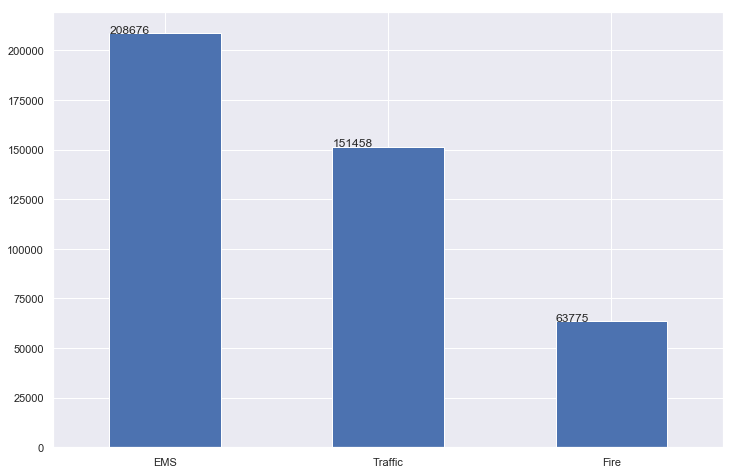

In [29]:
mpt.figure(figsize = (12,8))
ax = call_types.plot.bar()
for p in ax.patches:                                                                                                         #patches is used to create whatever type of patch we want for eg. rectangular patch
    ax.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()))       #to annotate all the points on the plot
mpt.xticks(rotation=0)                                                                                                   #this is used to give label on the axis
mpt.savefig("Emergency type vs Frequency.png")

In [30]:
data.info()                            #fetching info again to visualize in some other way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 15 columns):
lat              423909 non-null float64
lng              423909 non-null float64
desc             423909 non-null object
zip              371780 non-null float64
title            423909 non-null object
timeStamp        423909 non-null datetime64[ns]
twp              423750 non-null object
addr             423909 non-null object
e                423909 non-null int64
call_type        423909 non-null object
year             423909 non-null int64
month            423909 non-null object
day              423909 non-null object
hour             423909 non-null int64
emergecy_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 48.5+ MB


## Using groupby function to group specific feilds of data.

In [31]:
calls_data = data.groupby(['month', 'call_type'])['call_type'].count()           #grouped acc. to the types of calls in diff. months

In [32]:
calls_data.head()

month   call_type
April   EMS          17255
        Fire          4983
        Traffic      11345
August  EMS          17965
        Fire          5717
Name: call_type, dtype: int64

## Calculating percentage of calls

In [33]:
call_percentage = calls_data.groupby(level = 0).apply(lambda x: round(100*x/float(x.sum())))              #applying lambda funcs to calculate percentage

In [34]:
call_percentage.head()

month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         16.0
Name: call_type, dtype: float64

### Plotting a graph accordingly

In [35]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [36]:
call_percentage = call_percentage.reindex(month_order,  level=0)

In [37]:
call_percentage = call_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

In [38]:
call_percentage.head()

month     call_type
January   EMS          49.0
          Traffic      36.0
          Fire         15.0
February  EMS          51.0
          Traffic      35.0
Name: call_type, dtype: float64

Text(0.5, 1.0, 'Calls/Month')

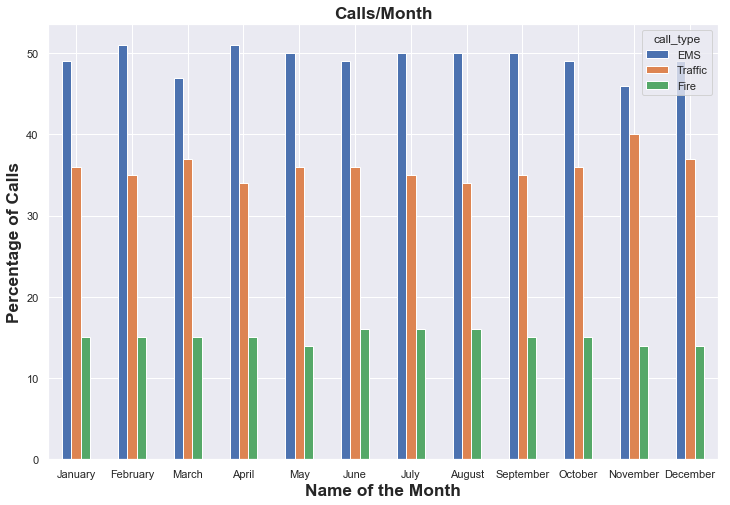

In [39]:
sb.set(rc={'figure.figsize':(12, 8)})
call_percentage.unstack().plot(kind='bar')                                             #making an unstacked graph
mpt.xlabel('Name of the Month', fontdict=font)
mpt.ylabel('Percentage of Calls', fontdict=font)
mpt.xticks(rotation=0)
mpt.title('Calls/Month', fontdict=font)

### Creating a pie chart of the same

In [40]:
call_percentage = call_percentage.sort_values(ascending=False)

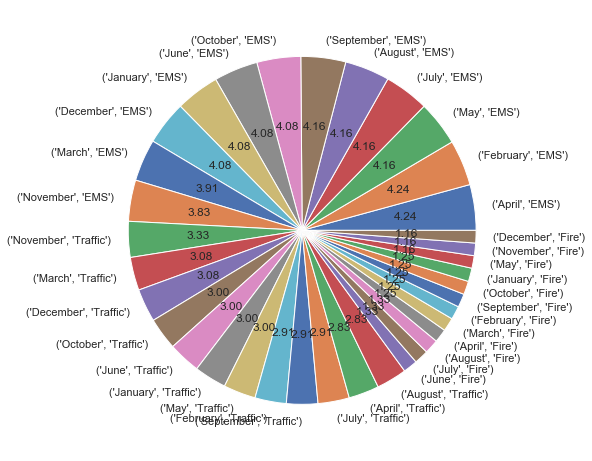

In [42]:
mpt.figure(figsize=(12,8))
mpt.pie(call_percentage,  labels = call_percentage.index, autopct="%.2f")
mpt.savefig("call percentage pie chart.png")

## Visualizing hourly data

In [57]:
hours_data = data.groupby(['hour', 'call_type'])['call_type'].count()

In [58]:
hours_data.head()

hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

## Calculating percentage of hours

In [59]:
hours_percentage = hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [60]:
hours_percentage.head()

hour  call_type
0     EMS          61.0
      Fire         16.0
      Traffic      24.0
1     EMS          64.0
      Fire         15.0
Name: call_type, dtype: float64

In [61]:
hours_percentage = hours_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

### Creating a plot accordingly

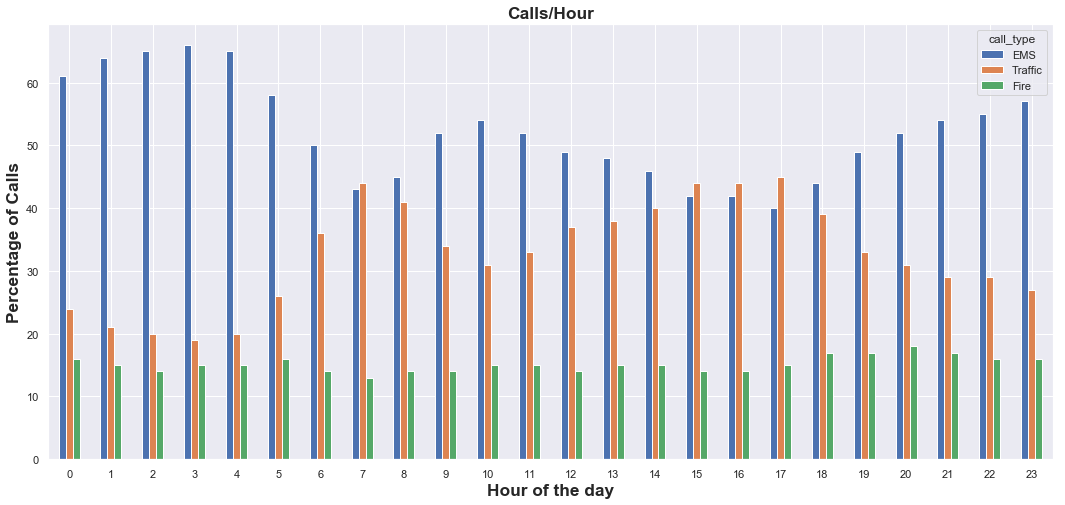

In [63]:
sb.set(rc={'figure.figsize':(18, 8)})
hours_percentage.unstack().plot(kind='bar')
mpt.xlabel('Hour of the day', fontdict=font)
mpt.ylabel('Percentage of Calls', fontdict=font)
mpt.xticks(rotation=0)
mpt.title('Calls/Hour', fontdict=font)
mpt.savefig("Percentage of calls vs hours.png")